### College Prediction : Private or Public
Here we have a dataset that has information about various colleges and the target value here is if a college is Private or Public
We are using KMeans algorithm which is unsupervised ML algorithm i.e. we will not take the target value into account when training the model. In the end, we can compare the predicted value to the original value to find accuracy of the model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('College_Data',index_col=0)

In [7]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [9]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<AxesSubplot:xlabel='Grad.Rate', ylabel='Room.Board'>

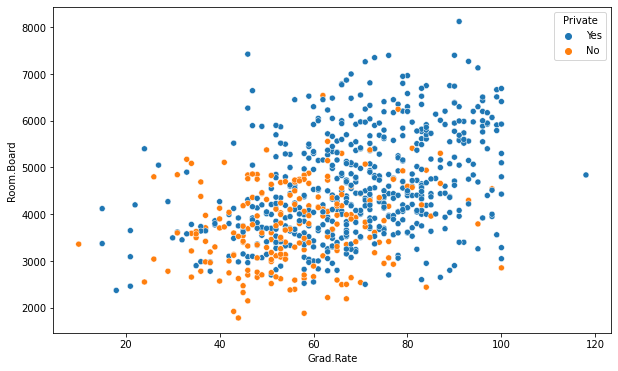

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df,x = 'Grad.Rate', y='Room.Board', hue = 'Private')

<AxesSubplot:xlabel='F.Undergrad', ylabel='Outstate'>

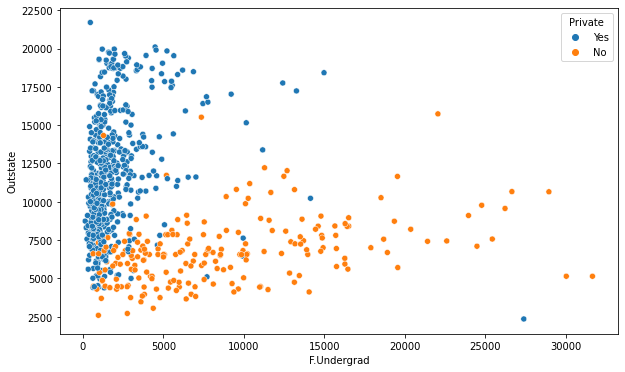

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df,x = 'F.Undergrad', y='Outstate', hue = 'Private')

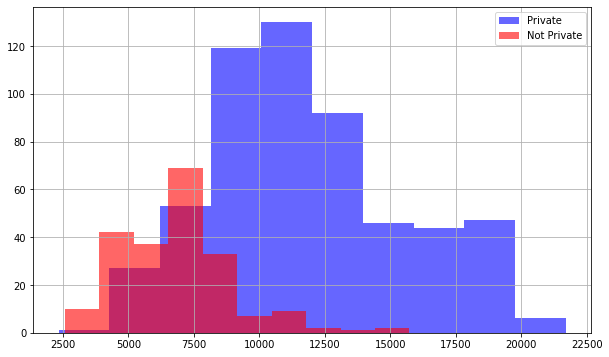

In [22]:
plt.figure(figsize=(10,6))
df[df['Private'] == 'Yes']['Outstate'].hist(color = 'blue',label = 'Private',alpha =0.6)
df[df['Private'] == 'No']['Outstate'].hist(label = 'Not Private', alpha = 0.6, color = 'red')
plt.legend()

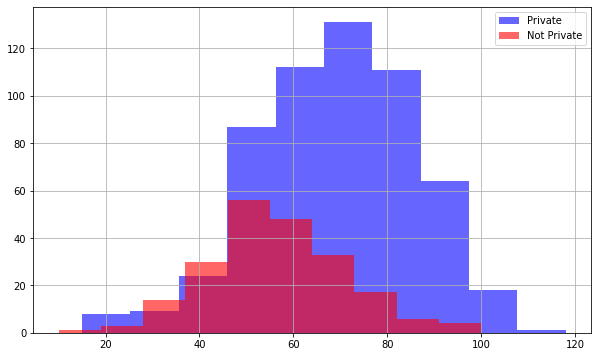

In [23]:
plt.figure(figsize=(10,6))
df[df['Private'] == 'Yes']['Grad.Rate'].hist(color = 'blue',label = 'Private',alpha =0.6)
df[df['Private'] == 'No']['Grad.Rate'].hist(label = 'Not Private', alpha = 0.6, color = 'red')
plt.legend()

In [27]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [28]:
df['Grad.Rate']['Cazenovia College'] = 100

C:\Users\simran.maurya\AppData\Local\Temp\ipykernel_19084\2087630962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


In [29]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


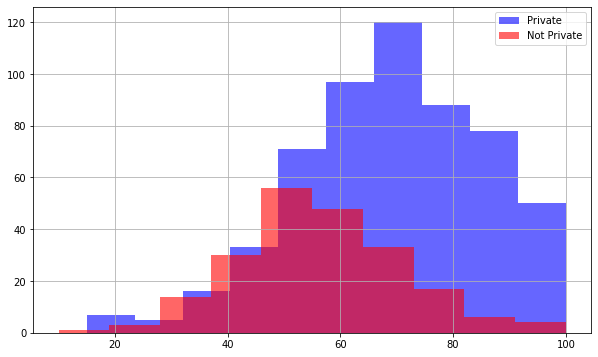

In [30]:
plt.figure(figsize=(10,6))
df[df['Private'] == 'Yes']['Grad.Rate'].hist(color = 'blue',label = 'Private',alpha =0.6)
df[df['Private'] == 'No']['Grad.Rate'].hist(label = 'Not Private', alpha = 0.6, color = 'red')
plt.legend()

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=2)

In [33]:
kmeans.fit(df.drop('Private', axis =1))

KMeans(n_clusters=2)

In [34]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [35]:
# Evaluate the model 
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
# Convert Private Yes , No to 1, 0 resp.
private_val = pd.get_dummies(df['Private'])

In [41]:
private_val['Yes']

Abilene Christian University      1
Adelphi University                1
Adrian College                    1
Agnes Scott College               1
Alaska Pacific University         1
                                 ..
Worcester State College           0
Xavier University                 1
Xavier University of Louisiana    1
Yale University                   1
York College of Pennsylvania      1
Name: Yes, Length: 777, dtype: uint8

In [42]:
print(classification_report(kmeans.labels_,private_val['Yes']))

              precision    recall  f1-score   support

           0       0.65      0.21      0.31       669
           1       0.06      0.31      0.10       108

    accuracy                           0.22       777
   macro avg       0.36      0.26      0.21       777
weighted avg       0.57      0.22      0.28       777



In [43]:
print(confusion_matrix(kmeans.labels_,private_val['Yes']))

[[138 531]
 [ 74  34]]
